Импортирование библиотек

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, roc_auc_score
import joblib
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import pickle

Загрузка очищенного датасета

In [16]:
# Загрузка данных
data = pd.read_csv('cleanedValid.csv')  # Замените на ваш файл с данными

Применение модели

In [17]:
with open('trained_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Подготовка данных для предсказания (удаление целевого столбца, если он есть)
X_new = data.drop(columns=['target'], errors='ignore')  # Удалите 'target', если есть

# Применение модели для предсказания вероятностей
data['score'] = model.predict_proba(X_new)[:,1]  # Вероятности для класса 1

# Сохранение результатов в новый CSV файл
data.to_csv('scoresValid.csv', index=False)


# Подсчет количества признаков target с значением 1
count_target_1 = (data['target'] == 1).sum()

# Подсчет количества признаков score с значением >= 0.5
count_score_ge_0_5 = (data['score'] >= 0.5).sum()

# Вывод результатов
print(f'Количество признаков target с значением 1: {count_target_1}')
print(f'Количество признаков score с значением >= 0.5: {count_score_ge_0_5}')


AttributeError: 'numpy.ndarray' object has no attribute 'predict_proba'

Метрика ROC AUC

ROC AUC: 0.9252895266868075
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       662
           1       0.80      0.67      0.73        12

    accuracy                           0.99       674
   macro avg       0.90      0.83      0.86       674
weighted avg       0.99      0.99      0.99       674



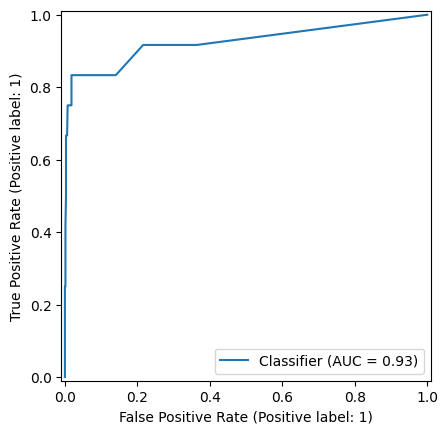

In [5]:
# Для расчета ROC-AUC на тестовых данных
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Рассчет ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {roc_auc}')

# Отчет классификации
print(classification_report(y_test, y_pred))

# Строим график ROC
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.show()